<h3>Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split,   GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate


<h3>Extracting Data

In [2]:
data=pd.read_csv("data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [181]:
X = data.drop(['result', 'Unnamed: 0'], axis=1)  # Assuming 'result' is the target variable
y = data['result']

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3> Standardize features

In [182]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>KNN Classification

In [183]:
# Set up KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameters and their possible values for tuning
max_k=int(len(X_train_scaled)**0.5)
param_grid = {
    'n_neighbors': list(range(1, max_k + 1, 2)),  # Starting from 1, up to max_k, with a step of 2
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
knn_best_params = grid_search.best_params_
print("Best Hyperparameters:", knn_best_params)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [184]:
# Train the KNN model with the best hyperparameters on the entire training set
best_knn_classifier = grid_search.best_estimator_
best_knn_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
knn_test_pred = best_knn_classifier.predict(X_test_scaled)

#Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_test_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_test_pred)
knn_classification_rep = classification_report(y_test, knn_test_pred)

knn_precision = precision_score(y_test, knn_test_pred)
knn_recall = recall_score(y_test, knn_test_pred)
knn_f1 = f1_score(y_test, knn_test_pred)

print("Test Accuracy:", knn_accuracy)
print("Test Confusion Matrix:\n", knn_conf_matrix)
print("Test Classification Report:\n", knn_classification_rep)

Test Accuracy: 0.9190751445086706
Test Confusion Matrix:
 [[146   2]
 [ 12  13]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       148
           1       0.87      0.52      0.65        25

    accuracy                           0.92       173
   macro avg       0.90      0.75      0.80       173
weighted avg       0.92      0.92      0.91       173



AUC: 0.8320270270270271


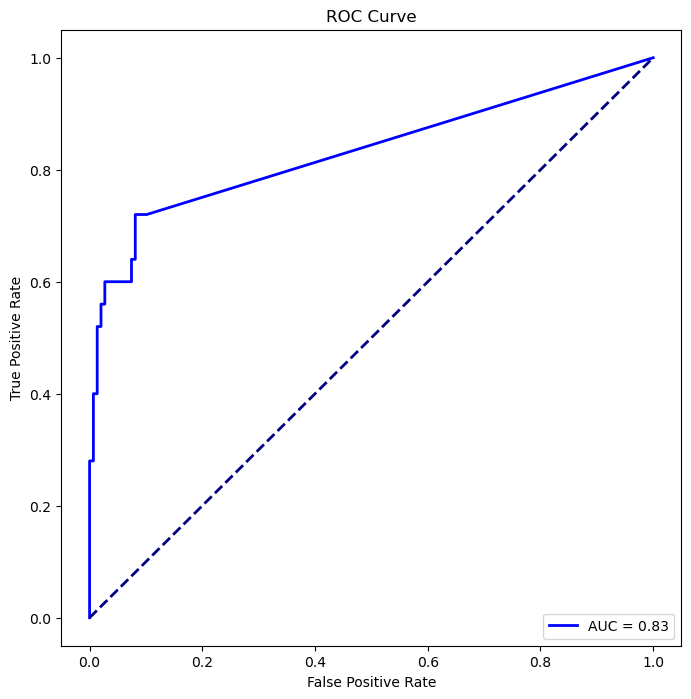

In [185]:
# Predict probabilities for the positive class on the test set
knn_probs = best_knn_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC
knn_auc = roc_auc_score(y_test, knn_probs)
print(f"AUC: {knn_auc}")

# Generate ROC curve
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'AUC = {knn_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h3>Logistic Regression Classification

In [186]:
# Set up Logistic Regression classifier
logistic_regression = LogisticRegression()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
logreg_best_params = grid_search.best_params_
print("Best Hyperparameters:", logreg_best_params)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


In [187]:
# Train the logistic regression model with the best hyperparameters on the entire training set
best_logistic_regression = grid_search.best_estimator_
best_logistic_regression.fit(X_train_scaled, y_train)

# Predict on the test set
logreg_test_pred = best_logistic_regression.predict(X_test_scaled)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_test_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_test_pred)
logreg_classification_rep = classification_report(y_test, logreg_test_pred)

logreg_precision = precision_score(y_test, logreg_test_pred)
logreg_recall = recall_score(y_test, logreg_test_pred)
logreg_f1 = f1_score(y_test, logreg_test_pred)

print("Test Accuracy:", logreg_accuracy)
print("Confusion Matrix:\n", logreg_conf_matrix)
print("Classification Report:\n", logreg_classification_rep)

Test Accuracy: 0.9364161849710982
Confusion Matrix:
 [[146   2]
 [  9  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       148
           1       0.89      0.64      0.74        25

    accuracy                           0.94       173
   macro avg       0.92      0.81      0.85       173
weighted avg       0.93      0.94      0.93       173



AUC: 0.922972972972973


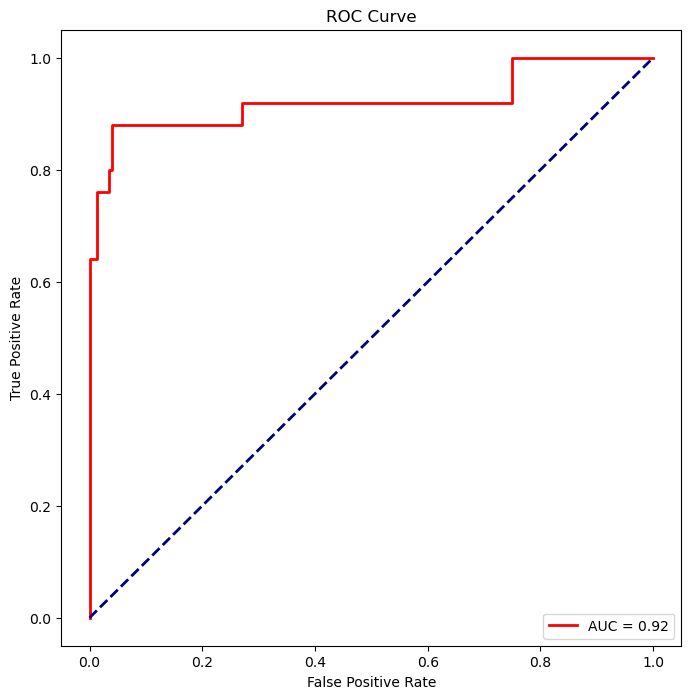

In [188]:
# Predict probabilities for the positive class on the test set
logreg_probs = best_logistic_regression.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC
logreg_auc = roc_auc_score(y_test, logreg_probs)
print(f"AUC: {logreg_auc}")

# Generate ROC curve
logreg_fpr, logreg_tpr, thresholds = roc_curve(y_test, logreg_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(logreg_fpr, logreg_tpr, color='red', lw=2, label=f'AUC = {logreg_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h3>Naive Bayes Classification

In [189]:
# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Define the hyperparameters and their possible values for tuning
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1]}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
naive_bayes_best_params = grid_search.best_params_
print("Best Hyperparameters:", naive_bayes_best_params)

Best Hyperparameters: {'var_smoothing': 0.1}


In [190]:
# Train the Naive Bayes model with the best hyperparameters on the entire training set
best_naive_bayes_classifier = grid_search.best_estimator_
best_naive_bayes_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
naive_bayes_test_pred = best_naive_bayes_classifier.predict(X_test_scaled)

# Evaluate the model
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_test_pred)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_test_pred)
naive_bayes_classification_rep = classification_report(y_test, naive_bayes_test_pred)

naive_bayes_precision = precision_score(y_test, naive_bayes_test_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_test_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_test_pred)

print("Test Accuracy:", naive_bayes_accuracy)
print("Test Confusion Matrix:\n", naive_bayes_conf_matrix)
print("Test Classification Report:\n", naive_bayes_classification_rep)

Test Accuracy: 0.815028901734104
Test Confusion Matrix:
 [[121  27]
 [  5  20]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       148
           1       0.43      0.80      0.56        25

    accuracy                           0.82       173
   macro avg       0.69      0.81      0.72       173
weighted avg       0.88      0.82      0.84       173



AUC: 0.8675675675675676


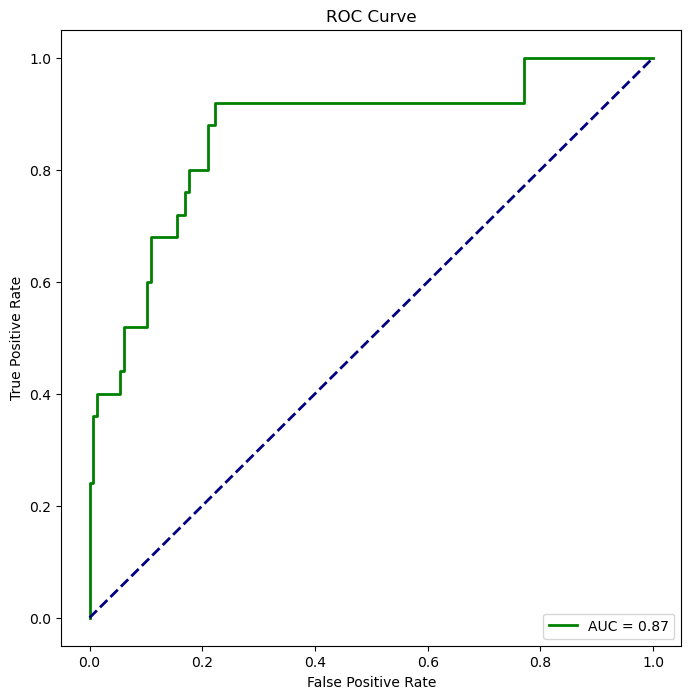

In [191]:
naive_bayes_probs = best_naive_bayes_classifier.predict_proba(X_test_scaled)[:, 1]
naive_bayes_auc = roc_auc_score(y_test, naive_bayes_probs)
print("AUC:", naive_bayes_auc)

# Generate ROC curve
naive_bayes_fpr, naive_bayes_tpr, thresholds = roc_curve(y_test, naive_bayes_probs)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color='green', lw=2, label=f'AUC = {naive_bayes_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<h4>Comparison Between Models</h4>

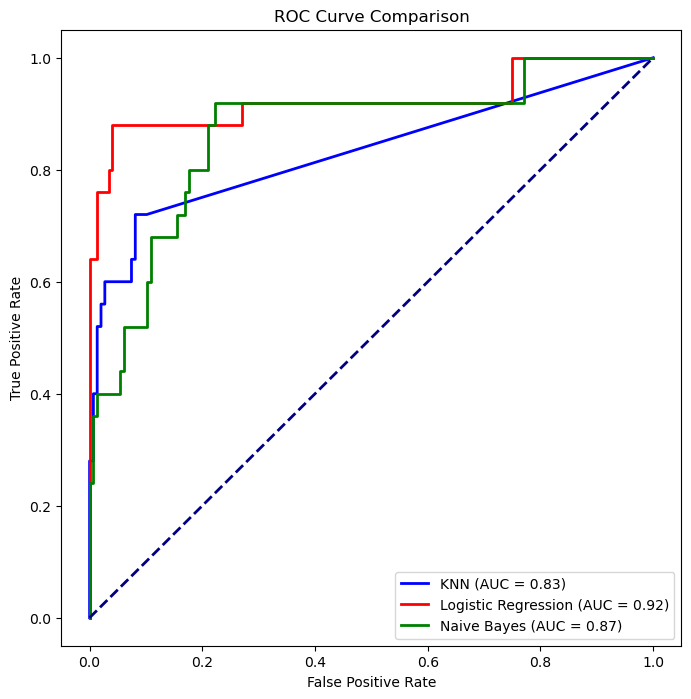

In [192]:
# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(knn_fpr, knn_tpr, color='blue', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(logreg_fpr, logreg_tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {logreg_auc:.2f})')
plt.plot(naive_bayes_fpr, naive_bayes_tpr, color='green', lw=2, label=f'Naive Bayes (AUC = {naive_bayes_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [193]:
# Sample data (replace with actual data)
classifiers = ['K-Nearest Neighbors', 'Logistic Regression', 'Naive Bayes']

# Metrics calculation
best_params = [knn_best_params, logreg_best_params, naive_bayes_best_params]
precision = [knn_precision, logreg_precision, naive_bayes_precision]
recall = [knn_recall, logreg_recall, naive_bayes_recall]
f1 = [knn_f1, logreg_f1, naive_bayes_f1]
roc_auc = [knn_auc, logreg_auc, naive_bayes_auc]

# Create the table
table_data = zip(classifiers, best_params, precision, recall, f1, roc_auc)
headers = ['Classifier', 'Best Hyperparameters', 'Precision', 'Recall', 'F1-Score', 'ROC/AUC']
table = tabulate(table_data, headers=headers, tablefmt='github')

# Display the table
print(table)


| Classifier          | Best Hyperparameters                              |   Precision |   Recall |   F1-Score |   ROC/AUC |
|---------------------|---------------------------------------------------|-------------|----------|------------|-----------|
| K-Nearest Neighbors | {'n_neighbors': 3, 'p': 1, 'weights': 'distance'} |    0.866667 |     0.52 |   0.65     |  0.832027 |
| Logistic Regression | {'C': 1, 'penalty': 'l2'}                         |    0.888889 |     0.64 |   0.744186 |  0.922973 |
| Naive Bayes         | {'var_smoothing': 0.1}                            |    0.425532 |     0.8  |   0.555556 |  0.867568 |


<h5>When choosing the hyperparameters and doing cross validation we choose the scoring method to be F1-score to decrease the average false positive and false negative rate of the model so according to the outcome it appears that logistic regression has the best F1-score of the 3 models so it's better to use logistic regression on this data</h5>